In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leash-BELKA/sample_submission.csv
/kaggle/input/leash-BELKA/train.parquet
/kaggle/input/leash-BELKA/test.parquet
/kaggle/input/leash-BELKA/train.csv
/kaggle/input/leash-BELKA/test.csv


In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 49.6 MB/s eta 0:00:00


In [3]:
train = pd.read_csv('/kaggle/input/leash-BELKA/train.csv', nrows=1000)
train.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,0,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,BRD4,0
1,1,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,HSA,0
2,2,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,sEH,0
3,3,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,BRD4,0
4,4,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,HSA,0


In [4]:
#By Chemdatafarmer  https://www.kaggle.com/code/chemdatafarmer/additional-seh-data/notebook
#By Meer Atif https://www.kaggle.com/code/meeratif/smiles-open-problems

from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDLogger

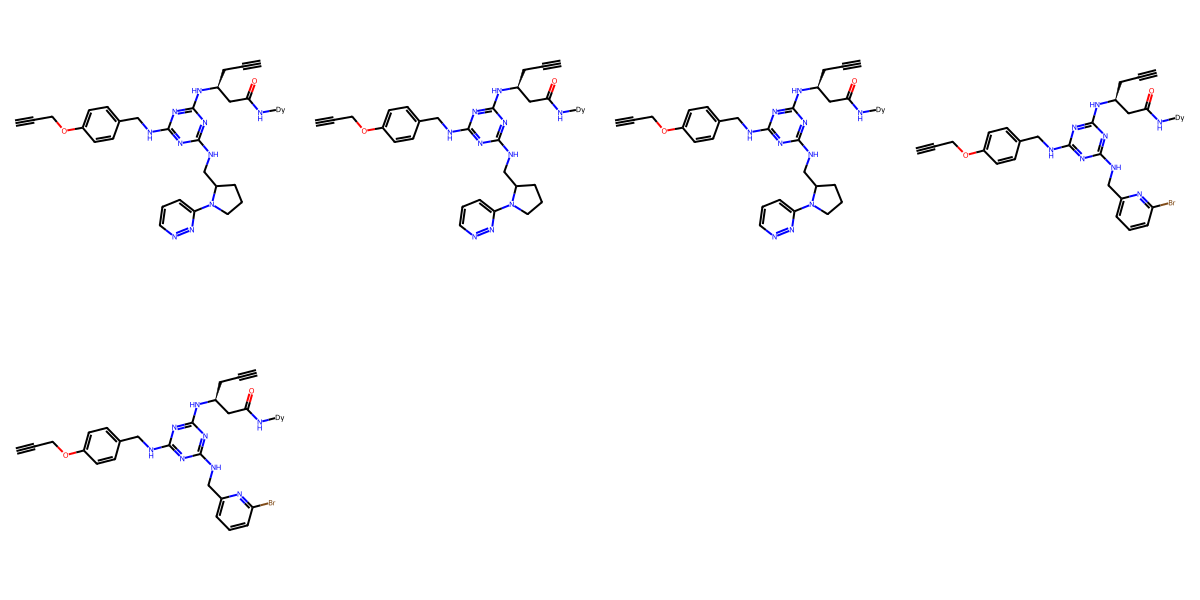

In [5]:
#https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html
#By Chemdatafarmer  https://www.kaggle.com/code/chemdatafarmer/additional-seh-data/notebook

Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in train['molecule_smiles'][0:5]], molsPerRow=4, subImgSize=(300,300))

In [6]:
!pip install duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 73.6 MB/s eta 0:00:00


In [7]:
import duckdb

train_path = '/kaggle/input/leash-BELKA/train.parquet'
test_path = '/kaggle/input/leash-BELKA/test.parquet'

con = duckdb.connect()

df = con.query(f"""(SELECT *
                        FROM parquet_scan('{train_path}')
                        WHERE binds = 0
                        ORDER BY random()
                        LIMIT 30000)
                        UNION ALL
                        (SELECT *
                        FROM parquet_scan('{train_path}')
                        WHERE binds = 1
                        ORDER BY random()
                        LIMIT 30000)""").df()

con.close()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [8]:
df.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,259048156,O=C(O)C[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)c1c...,Nc1cc(Br)ccc1CO,Cc1nnc(N)o1,Cc1nnc(Nc2nc(Nc3cc(Br)ccc3CO)nc(N[C@H](CC(=O)N...,HSA,0
1,25668514,CN(C(=O)OCC1c2ccccc2-c2ccccc21)[C@@H](CC1CCCCC...,Cl.NCCNC(=O)c1ccccc1F,Cc1nc(CN)oc1C.Cl.Cl,Cc1nc(CNc2nc(NCCNC(=O)c3ccccc3F)nc(N(C)[C@@H](...,HSA,0
2,214381619,O=C(Nc1cccc(I)c1C(=O)O)OCC1c2ccccc2-c2ccccc21,Nc1c2ccccc2nc2ccccc12,COC(CN)C1CCCOC1,COC(CNc1nc(Nc2cccc(I)c2C(=O)N[Dy])nc(Nc2c3cccc...,sEH,0
3,24491237,CCc1cccc(NC(=O)OCC2c3ccccc3-c3ccccc32)c1C(=O)O,Cl.Cl.NCc1nnc2n1CCOCC2,CCOc1cc(N)ccn1,CCOc1cc(Nc2nc(NCc3nnc4n3CCOCC4)nc(Nc3cccc(CC)c...,sEH,0
4,225823,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,COCOCCCN,COc1ccc(N)nc1,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCCCOCOC)nc(Nc2cc...,HSA,0


In [9]:
df.binds.describe()

count    60000.000000
mean         0.500000
std          0.500004
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: binds, dtype: float64

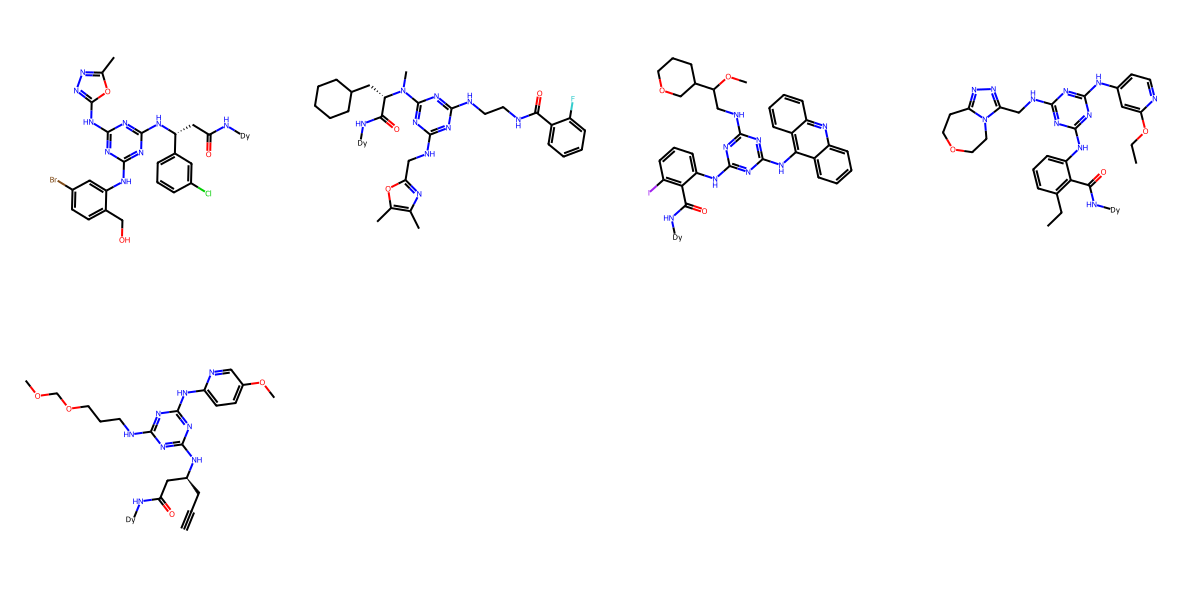

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in df['molecule_smiles'][0:5]], molsPerRow=4, subImgSize=(300,300))

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import OneHotEncoder

# Convert SMILES to RDKit molecules
df['molecule'] = df['molecule_smiles'].apply(Chem.MolFromSmiles)

# Generate ECFPs
def generate_ecfp(molecule, radius=2, bits=1024):
    if molecule is None:
        return None
    return list(AllChem.GetMorganFingerprintAsBitVect(molecule, radius, nBits=bits))

df['ecfp'] = df['molecule'].apply(generate_ecfp)

In [12]:
# One-hot encode the protein_name
onehot_encoder = OneHotEncoder(sparse_output=False)
protein_onehot = onehot_encoder.fit_transform(df['protein_name'].values.reshape(-1, 1))

# Combine ECFPs and one-hot encoded protein_name
X = [ecfp + protein for ecfp, protein in zip(df['ecfp'].tolist(), protein_onehot.tolist())]
y = df['binds'].tolist()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate the mean average precision
map_score = average_precision_score(y_test, y_pred_proba)
print(f"Mean Average Precision (mAP): {map_score:.2f}")

Mean Average Precision (mAP): 0.96


In [13]:
# Process the test.parquet file chunk by chunk
test_file = '/kaggle/input/leash-BELKA/test.csv'
output_file = 'submission.csv'  # Specify the path and filename for the output file

# Read the test.parquet file into a pandas DataFrame
for df_test in pd.read_csv(test_file, chunksize=100000):

    # Generate ECFPs for the molecule_smiles
    df_test['molecule'] = df_test['molecule_smiles'].apply(Chem.MolFromSmiles)
    df_test['ecfp'] = df_test['molecule'].apply(generate_ecfp)

    # One-hot encode the protein_name
    protein_onehot = onehot_encoder.transform(df_test['protein_name'].values.reshape(-1, 1))

    # Combine ECFPs and one-hot encoded protein_name
    X_test = [ecfp + protein for ecfp, protein in zip(df_test['ecfp'].tolist(), protein_onehot.tolist())]

    # Predict the probabilities
    probabilities = rf_model.predict_proba(X_test)[:, 1]

    # Create a DataFrame with 'id' and 'probability' columns
    output_df = pd.DataFrame({'id': df_test['id'], 'binds': probabilities})

    # Save the output DataFrame to a CSV file
    output_df.to_csv(output_file, index=False, mode='a', header=not os.path.exists(output_file))